In [300]:
#Case1
# A certain fruit grower in Florida has a boxcar loaded with fruit ready to be shipped north.
# The load consits of 900 boxes or oranges, 700 boxes of grapefruit, and 400 boxes of Tangerines
# The market prices, per box, of the different types of fruit in various cities are given
# in the Data Frame below.(Shipment)

# This example comes from:  An Introduction to Matrices Vectors and Linear Programming 
# by Hugh G. Campbell, page 13


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [301]:
Shipment = np.array([
    [4,2,3],
    [5,1,2],
    [4,3,2],
    [3,2,5]
])
print(Shipment)

[[4 2 3]
 [5 1 2]
 [4 3 2]
 [3 2 5]]


In [302]:
Cities =pd.DataFrame(Shipment,columns = ['oranges', 'grapefruit','tangerines'],index = ['NewYork','Cleveland','StLouis','OklahomaCity'])
print(Cities)

              oranges  grapefruit  tangerines
NewYork             4           2           3
Cleveland           5           1           2
StLouis             4           3           2
OklahomaCity        3           2           5


In [303]:
Vessel = np.array([900,700,400])
Vessel =Vessel.reshape(Vessel.shape[0],1)

In [304]:
Bx = pd.DataFrame(Vessel,columns=['boxes'], index = ['oranges','grapefruit','tangerines'])
print(Bx)

            boxes
oranges       900
grapefruit    700
tangerines    400


In [305]:
# The question asked: To which city should the carload of fruit be sent 
# in order for the grower to get maximum gross receipts for his fruit?

In [306]:
# We know how many boxes of each fruit we have and the prices per box for each city.
# So, we multiple the two matrices to see how much possible income we can receive from each city.

In [307]:
# Middle Matrix to find out possible income from all loctions
MiddleMatrix = (Cities[0:] * Bx.boxes)
print(MiddleMatrix)

              oranges  grapefruit  tangerines
NewYork          3600        1400        1200
Cleveland        4500         700         800
StLouis          3600        2100         800
OklahomaCity     2700        1400        2000


In [308]:
# The answer would be the city that reports the highest amount of income. 
# We can add each element in the Middle Matrix or we can simply use the .dot notation multiplication.

IncomeMatrix = pd.DataFrame(Cities.dot(Bx) )
print(IncomeMatrix)

              boxes
NewYork        6200
Cleveland      6000
StLouis        6500
OklahomaCity   6100


In [309]:
# Answer to the question would be the city from the highest possible income returned
print(IncomeMatrix[IncomeMatrix.boxes == IncomeMatrix.boxes.max()])

         boxes
StLouis   6500


In [310]:
# this is the same answer but return only City
print(IncomeMatrix[['boxes']].idxmax()) 

boxes    StLouis
dtype: object


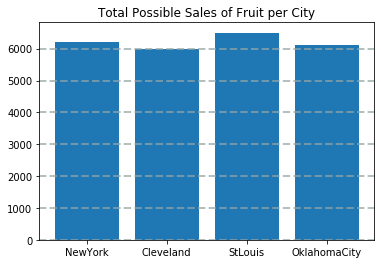

In [311]:
# From the bar chart, you can see that St. Louis would bring in the most income.
data1 = IncomeMatrix.boxes
plt.bar(['NewYork','Cleveland','StLouis','OklahomaCity'],data1)
plt.title('Total Possible Sales of Fruit per City')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()



In [312]:
# From the same logic, 
#Find out how much income we would receive for shipping only to New York

print(MiddleMatrix.loc['NewYork'])



oranges       3600
grapefruit    1400
tangerines    1200
Name: NewYork, dtype: int32


In [313]:
#Show all possible income from Oranges only
print(MiddleMatrix.oranges)

NewYork         3600
Cleveland       4500
StLouis         3600
OklahomaCity    2700
Name: oranges, dtype: int32


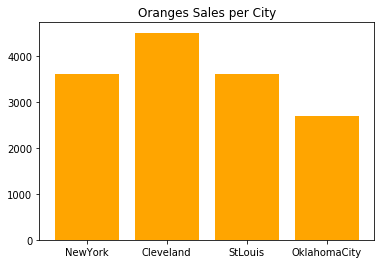

In [317]:
# Although St.Louis would bring in the most income, oranges would sell best in Cleveland.
plt.bar(['NewYork','Cleveland','StLouis','OklahomaCity'],MiddleMatrix.oranges,color = 'orange')
plt.title("Oranges Sales per City")
plt.show()

In [314]:
#Show all possible income from grapefruit
print(MiddleMatrix.grapefruit)

NewYork         1400
Cleveland        700
StLouis         2100
OklahomaCity    1400
Name: grapefruit, dtype: int32


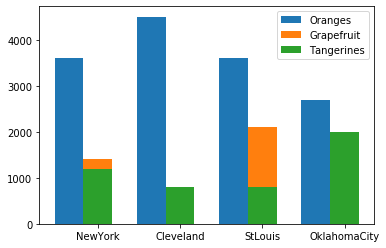

In [299]:
# From the chart below, we can see that oranges would bring in the most income than any of the other fruit.
# We can also see that the people in Oklahoma City like tangerines almost as much as people like 
# grapefruits in St.Louis. People in Cleveland love oranges but not grapefruit that much.

 
n = 4
data1 = MiddleMatrix.oranges
data2 = MiddleMatrix.grapefruit
data3 = MiddleMatrix.tangerines

ind = np.arange(n) 
width = 0.35       
plt.bar(ind, data1, width, label='Oranges')
plt.bar(ind + width, data2, width,label='Grapefruit')
plt.bar(ind + width, data3, width,label='Tangerines')

plt.xticks(ind + width , ('NewYork','Cleveland','StLouis','OklahomaCity'))
plt.legend(loc='best')
plt.show()
